In [48]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
from pathlib import Path
import torchvision
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class SpectrogramDataset(Dataset):
    def __init__(self, spectro_folder):
        self.spectrogram_folders = list(spectro_folder.glob('spectrogram_*'))
        self.transform = transforms.Compose([
            transforms.Resize((512, 512)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.spectrogram_folders)

    def __getitem__(self, idx):
        folder_path = self.spectrogram_folders[idx]

        # Load the spectrogram image
        img = Image.open(folder_path / 'spectrogram.png').convert('RGB')
        img = self.transform(img)

        # Load the label
        label_path = folder_path / 'label.txt'
        with open(label_path, 'r') as label_file:
            label = int(label_file.read().strip())

        return img, label

# Path to the folder containing your spectrograms
spectro_folder = Path('/Users/madssverker/Documents/GitHub/Bachelor_Thesis/spectrograms')

# Create a custom dataset
Data = SpectrogramDataset(spectro_folder)
print(Data)
# images = np.asarray(images)
# labels = np.asarray(labels)

# Split the dataset into train and test sets
# x_train, y_train, x_test, y_test = train_test_split(Data, test_size=0.2, shuffle=True, stratify=labels)
# print(images)
# # Create data loaders for train and test sets
# batch_size = 4  # Adjust as needed
# train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

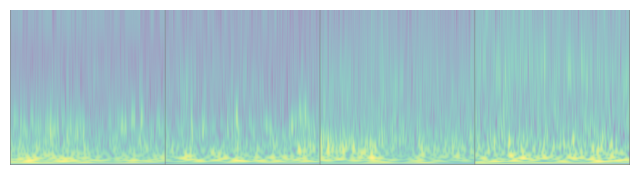

torch.Size([4, 3, 512, 512])


In [20]:
def show_image(img):
    img = img.detach().cpu()
    img = img / 2 + 0.5   # unnormalize
    with sns.axes_style("white"):
        plt.figure(figsize=(8, 8))
        plt.imshow(img.permute((1, 2, 0)).numpy())
        plt.axis('off')
        plt.show()

images, labels = next(iter(train_data_loader))
show_image(torchvision.utils.make_grid(images))
print(images.shape)

In [39]:
X_train = []
y_train = []
X_test = []
y_test = []

for images, labels in train_data_loader:
    X_train.append(images)
    y_train.append(labels)

X_train = torch.cat(X_train, dim=0)
y_train = torch.cat(y_train, dim=0)

for images, labels in test_data_loader:
    X_test.append(images)
    y_test.append(labels)

X_test = torch.cat(X_test, dim = 0)
y_test = torch.cat(y_test, dim = 0)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
# y_train = np.reshape(y_train, (y_train.reshape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
# y_test = np.reshape(y_test, (y_test.reshape[0], -1))

tensor(3)


In [36]:
from sklearn import svm
# Create a multiclass SVM model
svm_model = svm.SVC(decision_function_shape='ovo')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Test the model on a test datapoint
test_datapoint = X_test[8]
predicted_label = svm_model.predict(test_datapoint.unsqueeze(0))

print("Predicted label:", predicted_label.item())


Predicted label: 1


In [43]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the test dataset
predicted_labels = svm_model.predict(X_test)

print(predicted_labels)
print(y_test)


[1 4 1 1 1 4 4 4 1 2 5 2 4 2 2 2 2 4 4 2]
tensor([3, 4, 5, 1, 5, 3, 3, 3, 3, 2, 3, 1, 3, 1, 5, 2, 5, 4, 4, 1])
